# Performance examples

In this notebook we show 3 images that give lowest/highest loss (MSE) with MobileNetV2 and ResNet50.

In [1]:
from Models.mobilenet_v2 import MobileNetV2Tuned
from Models.resnet_50 import ResNetTuned
from Loss.losses import mse_visible_lists
from Filters.glasses import GlassesFilter
from Filters.hat import HatFilter
from Filters.beard import BeardFilter
from Data.data_generator import DataGenerator

import numpy as np
from tqdm.auto import trange
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [2]:
img_name_list = pd.read_csv("Data/test/labels.csv")["image"]
test_generator = DataGenerator(data_path="Data/test", batch_size=1, shuffle=False)
glasses_filter = GlassesFilter()
hat_filter = HatFilter()
beard_filter = BeardFilter()

def sort_losses(model):
    """
    Function that return sorted losses and corresponding images and predictions for given model.
    """
    losses = {}
    predictions = {}
    
    for i in trange(len(test_generator)):
        # Obtain image, true keypoints and predicted keypoints
        img, y_true = test_generator[i]
        img_name = img_name_list[i]
        y_true = y_true[0]
        preds = model.predict(img)
        y_pred = [int(np.round(point)) for point in preds[0]]
        
        # Compute the loss and add it to the dictionary
        losses[img_name] = mse_visible_lists(y_true, y_pred)
        predictions[img_name] = y_pred
    
    # Sort losses
    sorted_losses = {k: v for k, v in sorted(losses.items(), key=lambda item: item[1])}
    
    return sorted_losses, predictions

def plot_images(img_list, predictions):
    """
    Function that plot 3 images with worst/best predictions
    """
    plt.figure(figsize=(10,10))
    
    for i, img in enumerate(img_list):
        preds = predictions[img]
        
        # Plot the image
        img = cv2.imread("Data/test/images/" + img)
        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        # Plot the model predictions
        img_preds = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for x, y in zip(preds[::2], preds[1::2]):
            img_preds = cv2.circle(img_preds, (x, y), radius=3, color=(255, 0, 0), thickness=-1)
        plt.subplot(3, 3, i+4)
        plt.imshow(img_preds)
        
        # Plot the image with filters
        img_filters = img.copy()
        img_filters = glasses_filter.place_filter(img_filters, preds)
        img_filters = hat_filter.place_filter(img_filters, preds)
        img_filters = beard_filter.place_filter(img_filters, preds)
        img_filters = cv2.cvtColor(img_filters, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, i+7)
        plt.imshow(img_filters)
        
    plt.show()

## MobileNetV2

In [3]:
model = MobileNetV2Tuned()
model.load_model("mobilenet_v2_mse.h5")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast (TFOpLambda)        (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                             

In [4]:
losses, predictions = sort_losses(model)

  0%|          | 0/998 [00:00<?, ?it/s]

### Images with lowest loss

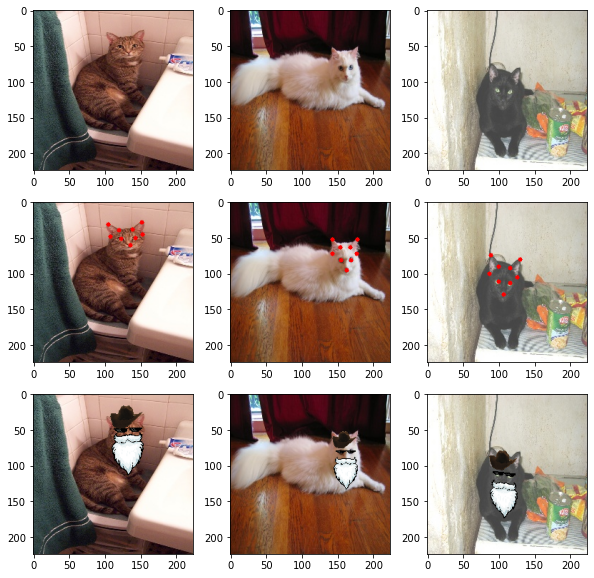

In [5]:
img_list = [k for k, v in list(losses.items())[:3]]
plot_images(img_list, predictions)

### Images with highest loss

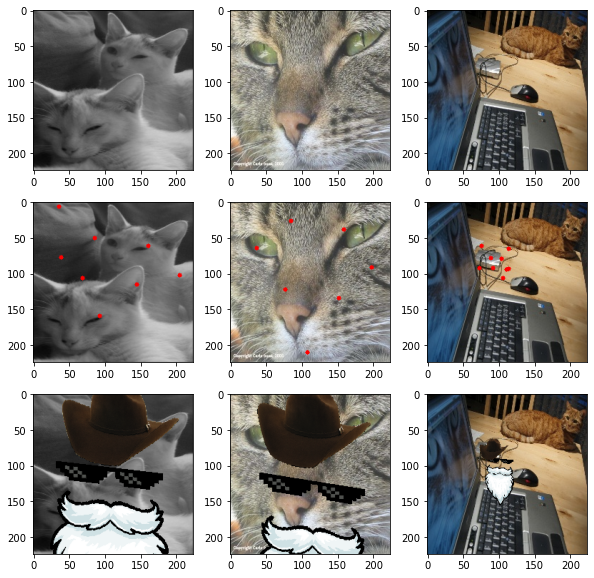

In [6]:
img_list = [k for k, v in list(losses.items())[-3:]]
plot_images(img_list, predictions)

## ResNet50

In [7]:
model = ResNetTuned()
model.load_model("resnet.h5")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_1 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 18)                36882     
                                                           

In [8]:
losses, predictions = sort_losses(model)

  0%|          | 0/998 [00:00<?, ?it/s]

### Images with lowest loss

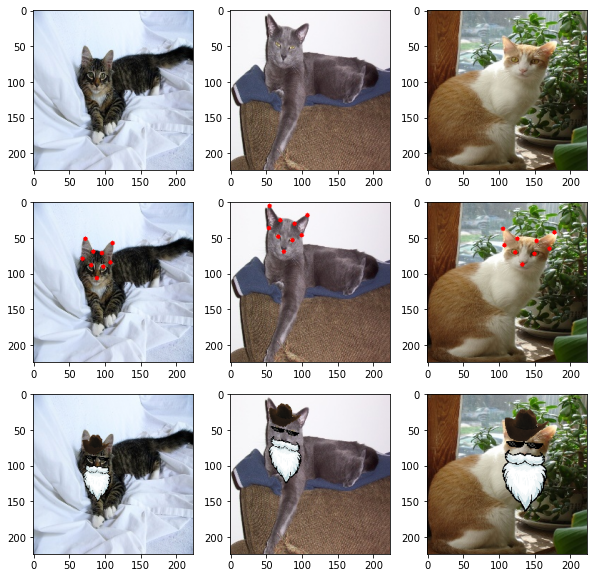

In [9]:
img_list = [k for k, v in list(losses.items())[:3]]
plot_images(img_list, predictions)

### Images with highest loss

D:\faks\Deep learning\Project\dl_project\Filters\hat.py:40: UserWarning: Right ear is located left of the left ear. Placing of the filter unsuccessful.
  warnings.warn("Right ear is located left of the left ear. Placing of the filter unsuccessful.")


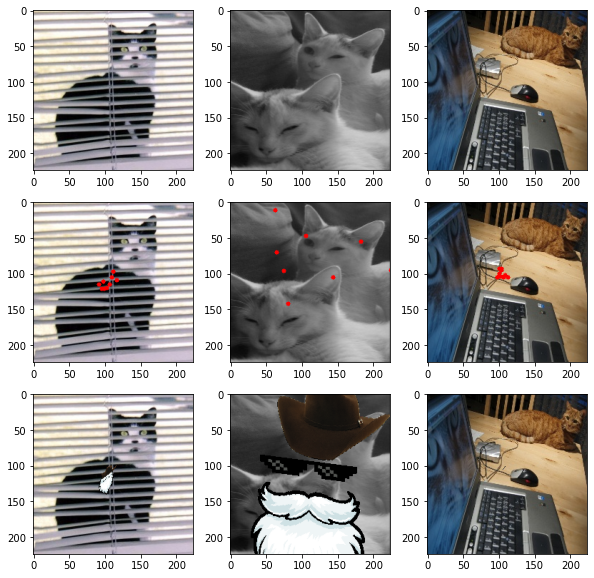

In [10]:
img_list = [k for k, v in list(losses.items())[-3:]]
plot_images(img_list, predictions)